# K Nearest Neighbors (KNN) Classifiers

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]


In [82]:
# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [83]:
music.head(10)

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1
5,197,9,1
6,294,29,0
7,382,22,1
8,102,10,1
9,264,24,0


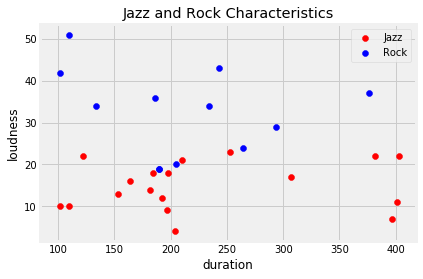

In [84]:
# Visualizing the data:

plt.scatter(music[music['jazz'] == 1].duration, 
            music[music['jazz'] == 1].loudness,
            color = 'red'
           )
plt.scatter(music[music['jazz'] == 0].duration,
            music[music['jazz'] == 0].loudness,
            color = 'blue'
           )
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('duration')
plt.ylabel('loudness')
plt.show()

Running the model using the SKLearn package:

In [85]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors = 1)

# Features we feed into the model: 
X = music[['loudness', 'duration']]

# Target is whether or not the music is Jazz 
Y = music.jazz

# Fit our data 
neighbors.fit(X, Y)

# Predict a song based on an inputted loudness and duration
neighbors.predict([[35, 230]])

array([0])

The nearest neighbors model predicted [0], which means the song is not Jazz, and therefore Rock - based on the nearest neighboring point to the inputted loudness and duration.

All it takes to train the model is a dataframe of independent variables and a dataframe of dependent outcomes. 

### K-Nearest Neighbors

An extension of nearest neighbors, this time looking at k-number of nearest neighbors. 

In [86]:
neighbors = KNeighborsClassifier(n_neighbors = 5)
X = music[['loudness', 'duration']]
Y = music.jazz

neighbors.fit(X, Y)

print("The prediciton is: " + str(neighbors.predict([[35, 230]])))
print("The probabilities of the factors deciding the prediction is " + str(neighbors.predict_proba([[35, 230]])))


The prediciton is: [0]
The probabilities of the factors deciding the prediction is [[0.6 0.4]]


## Looking at a visualization of the decision bounds

A _mesh_ allows us to generate a prediction over the whole space. 
Here we create the mesh:

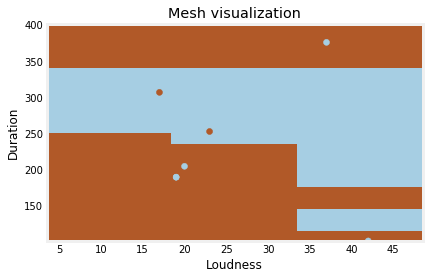

In [87]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 15.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()



## Challenge: Implement the Nearest Neighbor algorithm 

Using the music dataset, build a nearest neighbor algorithm from scratch. Test against the SKLearn package

In [89]:

music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


In [168]:
# Redefine X and Y out of their arrays used in the mesh:
X = music[['loudness', 'duration']]
Y = music.jazz

# the point we want to test (used above with SKLearn)
point = [[35, 230]]

# first, a function to calculate the euclidean distance between the
# test point and another point in our training set, X

def euclideanDistance(point, X):
    '''
    Returns list of euclidean distances
    between test point and training data
    '''
    distance = []
    for i in range(len(point)): # loop test thru the training set X
        distance.append(np.sqrt(np.sum(np.square(point[i] - X), axis = 1)))
    return distance

# Testing the euclideanDistance function:

#print("Distances of points from our test point:")
#print(euclideanDistance(point,X))
# a function to get k neighbors votes

def neighborVotes(X, point, k):
    '''
    Returns votes for shortest k euclidean distances
    '''
    sorted_distances = np.argsort(euclideanDistance(point, X)) # sort distances indices ascending
    #print(sorted_distances)
    distance_k = [] # empty list to put index of closest k distance indicies
    
    for n in range(k):
        distance_k = sorted_distances[:, :k]
        print(distance_k)
        for i in distance_k:
            votes = [] # empty list to votes into
            votes.append(music['jazz'].iloc[i])
        return(votes)
    
# testing neighborVotes function with k = 5
#print("\n neighborVotes")
print(neighborVotes(X, point, 5))


#write function to classify with knn
def knn_classifier(X, point, k):
    '''
    Returns classification based on mode of votes
    Mode array = classification
    count array = number of votes
    '''
    prediction = scipy.stats.mode(neighborVotes(X, point, k), axis=None)
    return prediction

print(knn_classifier(X,point,5))

[[24  2 18 23 10]]
[24    0
2     0
18    1
23    1
10    0
Name: jazz, dtype: int64]
[[24  2 18 23 10]]
ModeResult(mode=array([0]), count=array([3]))
